# TEST of custom SAC agent on easy environment

In [1]:
import gymnasium as gym
import seaborn as sns
import matplotlib.pyplot as plt

import torch

import numpy as np
import pandas as pd

from custom_agent.CTCE.sac_agent import Agent

In [2]:
env = gym.make("Swimmer-v4")

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
3
Box(-2.0, 2.0, (1,), float32)
[2.]
1


In [3]:
sac_agent = Agent(env, batch_size=100, buffer_max_size=100000)

In [4]:
logs_list = []

for i in range(1):
    # make agent
    sac_agent = Agent(env, batch_size=100, buffer_max_size=100000)
    
    # training run
    sac_agent.train(nr_steps = 15000, warmup_steps = 1000, learn_delay = 100, learn_freq = 1, learn_weight = 1)

-1241.5771649510946


KeyboardInterrupt: 

In [ ]:
from gymnasium.utils.save_video import save_video
env2 = gym.make("Pendulum-v1", g=9.81, render_mode = "rgb_array_list")

# test loop
obs, info = env2.reset()
done = 0
truncated = 0
for _ in range(100):
    action = sac_agent.get_action(obs, False, True)

    next_obs, reward, done, truncated, info = env2.step(action)

    obs = next_obs

save_video(env2.render(), "videos", name_prefix = "custom_SAC_pendulum", fps=env.metadata["render_fps"], step_starting_index=0)

Moviepy - Building video /home/hkolstee/masterThesis/masterThesis/videos/custom_SAC_pendulum-episode-0.mp4.
Moviepy - Writing video /home/hkolstee/masterThesis/masterThesis/videos/custom_SAC_pendulum-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/hkolstee/masterThesis/masterThesis/videos/custom_SAC_pendulum-episode-0.mp4


# Somewhat more difficult env (still not very difficult): Half Cheetah V4

In [ ]:
import gymnasium as gym
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from custom_agent.CTCE.sac_agent_AE import Agent

In [ ]:
env = gym.make("HalfCheetah-v4")
print(env.observation_space)
print(env.observation_space.shape)
print(env.action_space)
print(env.action_space.high)
print(env.action_space.shape)

Box(-inf, inf, (17,), float64)
(17,)
Box(-1.0, 1.0, (6,), float32)
[1. 1. 1. 1. 1. 1.]
(6,)


In [ ]:
logs_list = []

for i in range(3):
    # make agent
    sac_agent = Agent(env, batch_size=100, buffer_max_size=1000000)
    
    # training run
    logs = sac_agent.train(200000, warmup_steps=10000, learn_delay = 5000, learn_freq = 1, learn_weight = 1)
    
    # save training logs for this run
    logs_list.append(logs)

/home/hkolstee/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
[Episode 200 mean reward: 6.471] ~ : 100%|██████████| 200000/200000 [1:26:37<00:00, 38.48it/s]  


In [ ]:
logs = pd.concat(logs_list)

In [ ]:
display(logs[0:10])

,step,avg_reward,avg_actor_loss,avg_critic_loss,avg_policy_entr,avg_alpha,avg_alpha_loss
0,999.0,-0.353920,NaN,NaN,NaN,NaN,NaN
1,1999.0,-0.262733,NaN,NaN,NaN,NaN,NaN
2,2999.0,-0.366206,NaN,NaN,NaN,NaN,NaN
3,3999.0,-0.178513,NaN,NaN,NaN,NaN,NaN
4,4999.0,-0.265593,NaN,NaN,NaN,NaN,NaN
5,5999.0,-0.230649,-12.450510,4.256743,-3.980837,0.849549,8.480880
6,6999.0,-0.367321,-20.209608,3.608764,-3.952054,0.549717,5.478579
7,7999.0,-0.418725,-22.724033,2.915450,-3.389643,0.254338,2.424310
8,8999.0,-0.179978,-22.726765,2.392083,3.375803,0.041806,0.184745
9,9999.0,-0.126800,-23.764215,2.408928,5.998601,0.024521,0.000132


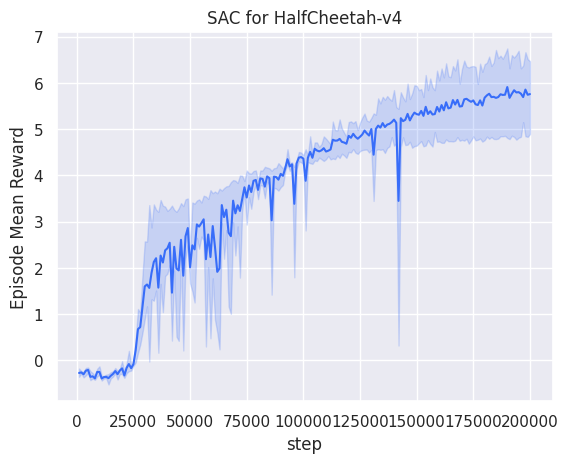

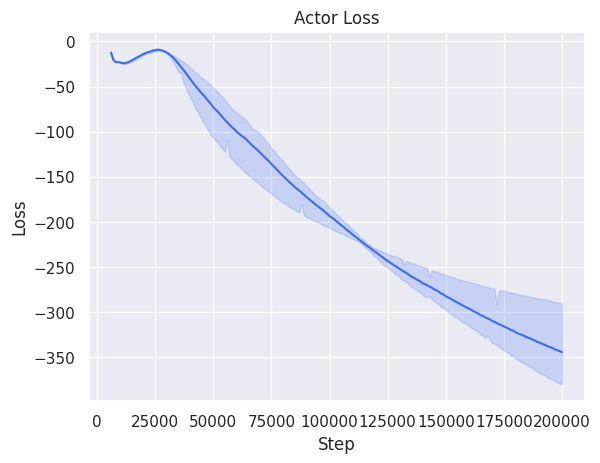

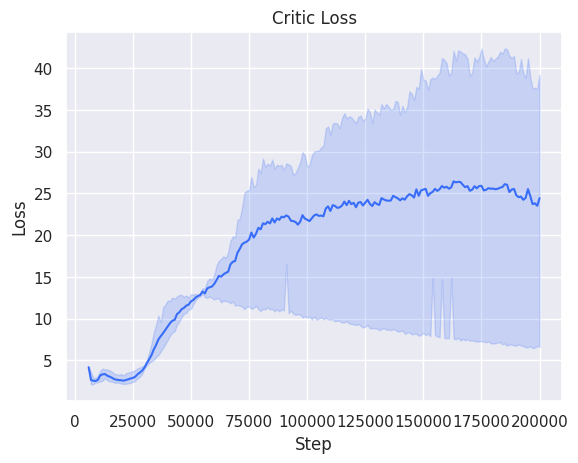

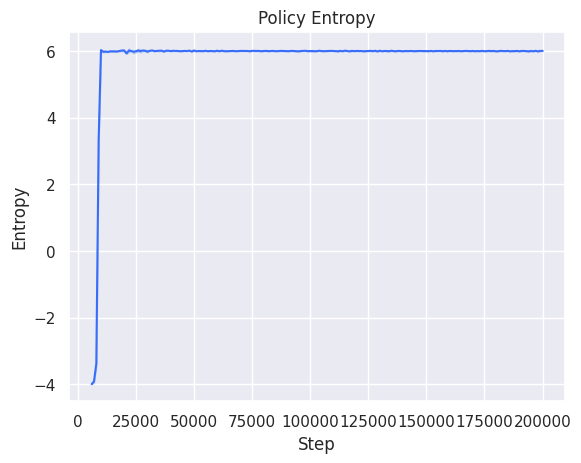

[Text(0.5, 1.0, 'Entropy Coefficient (alpha)'),
 Text(0.5, 0, 'Step'),
 Text(0, 0.5, 'Value')]

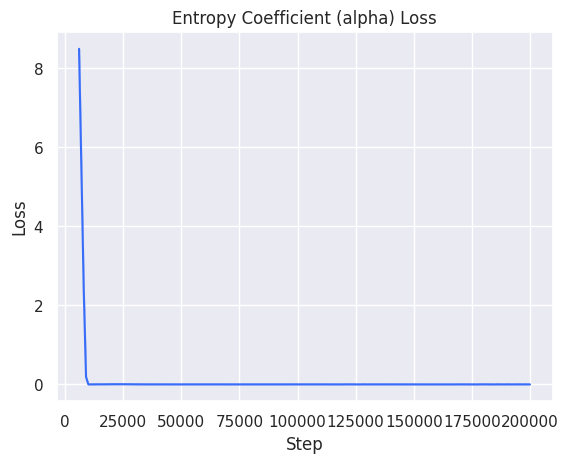

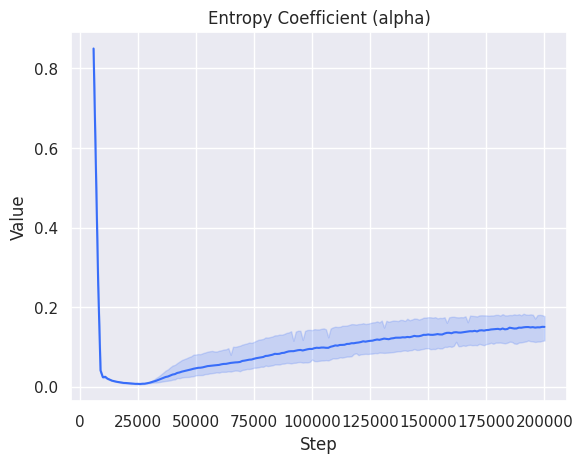

In [ ]:
learn_delay = 5000

plt.figure()
sns.set(style="darkgrid", palette="rainbow")
plot = sns.lineplot(data = logs, x = "step", y = "avg_reward")
plot.set(title="SAC for HalfCheetah-v4", xlabel = "step", ylabel = "Episode Mean Reward")
plt.show()

plt.figure()
sns.set(style="darkgrid", palette="rainbow")
plot = sns.lineplot(data = logs[logs["step"] > learn_delay], x = "step", y = "avg_actor_loss")
plot.set(title="Actor Loss", xlabel = "Step", ylabel = "Loss")
plt.show()

plt.figure()
sns.set(style="darkgrid", palette="rainbow")
plot = sns.lineplot(data = logs[logs["step"] > learn_delay], x = "step", y = "avg_critic_loss")
plot.set(title="Critic Loss", xlabel = "Step", ylabel = "Loss")
plt.show()

plt.figure()
sns.set(style="darkgrid", palette="rainbow")
plot = sns.lineplot(data = logs[logs["step"] > learn_delay], x = "step", y = "avg_policy_entr")
plot.set(title="Policy Entropy", xlabel = "Step", ylabel = "Entropy")
plt.show()

plt.figure()
sns.set(style="darkgrid", context="notebook", palette="rainbow")
sns.lineplot(data = logs[logs["step"] > learn_delay], x = "step", y = "avg_alpha_loss").set(title="Entropy Coefficient (alpha) Loss", xlabel = "Step", ylabel = "Loss")

plt.figure()
sns.set(style="darkgrid", context="notebook", palette="rainbow")
sns.lineplot(data = logs[logs["step"] > learn_delay], x = "step", y = "avg_alpha").set(title="Entropy Coefficient (alpha)", xlabel = "Step", ylabel = "Value")

In [ ]:
from gymnasium.utils.save_video import save_video

env2 = gym.make("HalfCheetah-v4", render_mode = "rgb_array_list")

# test loop
obs, info = env2.reset()
done = 0
truncated = 0
while not (done or truncated):
    action = sac_agent.get_action(obs, False, True)

    next_obs, reward, done, truncated, info = env2.step(action)

    obs = next_obs

save_video(env2.render(), "videos", name_prefix = "custom_SAC_halfcheetahv4", fps=env.metadata["render_fps"], step_starting_index=0)

Moviepy - Building video /home/hkolstee/masterThesis/masterThesis/videos/custom_SAC_halfcheetahv4-episode-0.mp4.
Moviepy - Writing video /home/hkolstee/masterThesis/masterThesis/videos/custom_SAC_halfcheetahv4-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/hkolstee/masterThesis/masterThesis/videos/custom_SAC_halfcheetahv4-episode-0.mp4


# Ant env

In [ ]:
import gymnasium as gym
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from custom_agent.CTCE.sac_agent_AE import Agent

In [ ]:
env = gym.make("Ant-v4")
print(env.observation_space)
print(env.observation_space.shape)
print(env.action_space)
print(env.action_space.high)
print(env.action_space.shape)

Box(-inf, inf, (27,), float64)
(27,)
Box(-1.0, 1.0, (8,), float32)
[1. 1. 1. 1. 1. 1. 1. 1.]
(8,)


In [ ]:
logs_list = []
learn_delay = 5000

for i in range(1):
    # make agent
    sac_agent = Agent(env, batch_size=256, buffer_max_size=1000000)
    
    # training run
    logs = sac_agent.train(1000000, warmup_steps=10000, learn_delay = learn_delay, learn_freq = 1, learn_weight = 1)
    0
    # save training logs for this run
    logs_list.append(logs)

/home/hkolstee/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
[Episode 1200 mean reward: 5.512] ~ : 100%|██████████| 1000000/1000000 [10:38:48<00:00, 26.09it/s] 


In [ ]:
logs = pd.concat(logs_list)

In [ ]:
display(logs[0:10])

,step,avg_reward,avg_actor_loss,avg_critic_loss,avg_policy_entr,avg_alpha,avg_alpha_loss
0,207.0,-0.345657,NaN,NaN,NaN,NaN,NaN
1,286.0,-0.357435,NaN,NaN,NaN,NaN,NaN
2,340.0,-0.473709,NaN,NaN,NaN,NaN,NaN
3,442.0,-0.399168,NaN,NaN,NaN,NaN,NaN
4,487.0,-0.841254,NaN,NaN,NaN,NaN,NaN
5,639.0,0.064869,NaN,NaN,NaN,NaN,NaN
6,711.0,-0.396588,NaN,NaN,NaN,NaN,NaN
7,1711.0,-0.366795,NaN,NaN,NaN,NaN,NaN
8,2711.0,-0.310378,NaN,NaN,NaN,NaN,NaN
9,2776.0,-1.051019,NaN,NaN,NaN,NaN,NaN


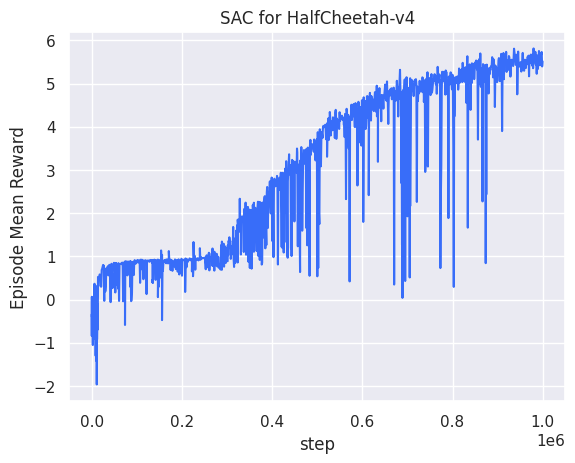

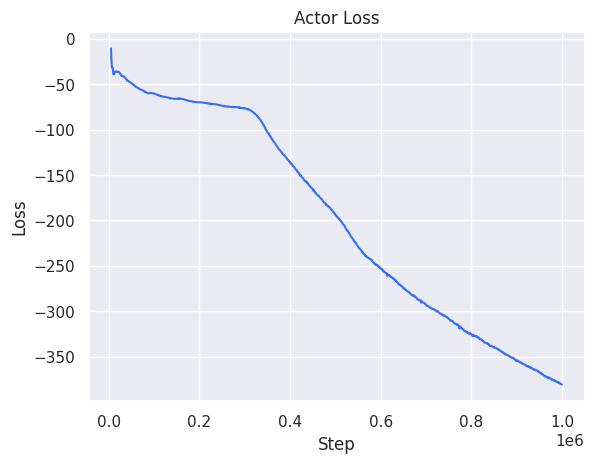

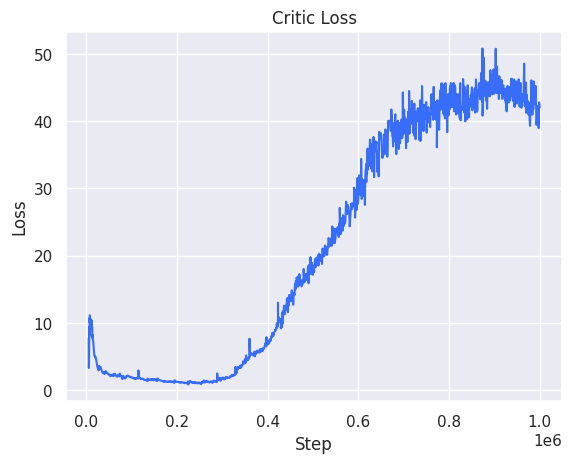

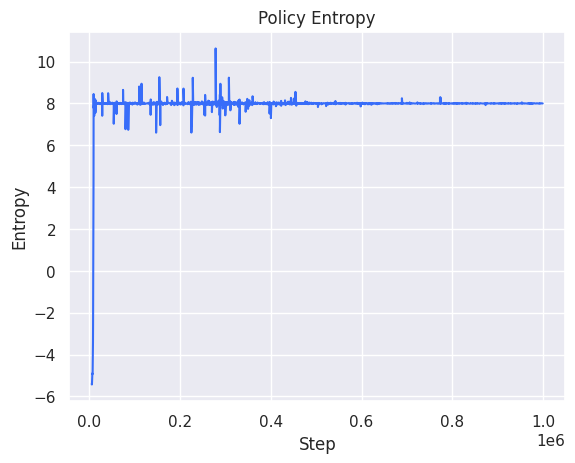

[Text(0.5, 1.0, 'Entropy Coefficient (alpha)'),
 Text(0.5, 0, 'Step'),
 Text(0, 0.5, 'Value')]

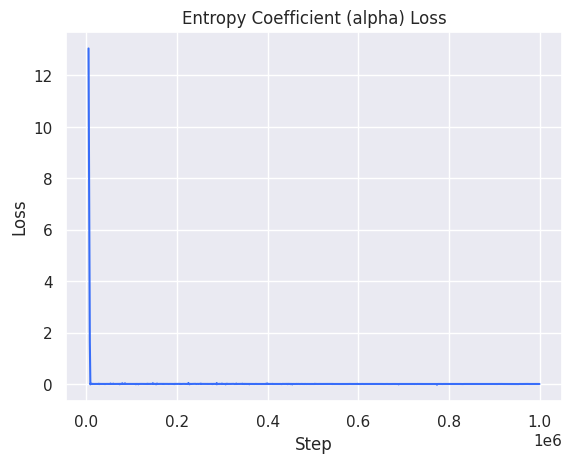

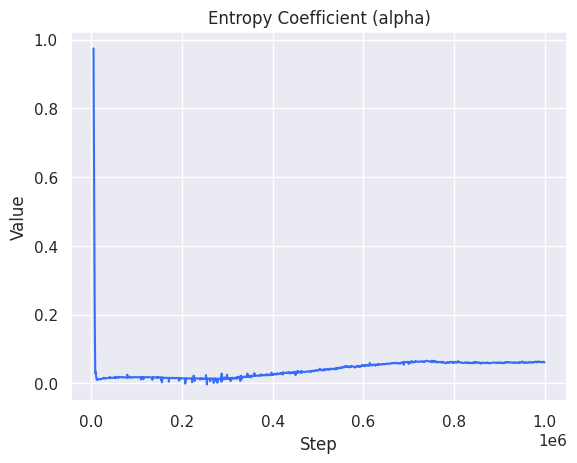

In [ ]:
learn_delay = 5000

plt.figure()
sns.set(style="darkgrid", palette="rainbow")
plot = sns.lineplot(data = logs, x = "step", y = "avg_reward")
plot.set(title="SAC for Ant-v4", xlabel = "step", ylabel = "Episode Mean Reward")
plt.show()

plt.figure()
sns.set(style="darkgrid", palette="rainbow")
plot = sns.lineplot(data = logs[logs["step"] > learn_delay], x = "step", y = "avg_actor_loss")
plot.set(title="Actor Loss", xlabel = "Step", ylabel = "Loss")
plt.show()

plt.figure()
sns.set(style="darkgrid", palette="rainbow")
plot = sns.lineplot(data = logs[logs["step"] > learn_delay], x = "step", y = "avg_critic_loss")
plot.set(title="Critic Loss", xlabel = "Step", ylabel = "Loss")
plt.show()

plt.figure()
sns.set(style="darkgrid", palette="rainbow")
plot = sns.lineplot(data = logs[logs["step"] > learn_delay], x = "step", y = "avg_policy_entr")
plot.set(title="Policy Entropy", xlabel = "Step", ylabel = "Entropy")
plt.show()

plt.figure()
sns.set(style="darkgrid", context="notebook", palette="rainbow")
sns.lineplot(data = logs[logs["step"] > learn_delay], x = "step", y = "avg_alpha_loss").set(title="Entropy Coefficient (alpha) Loss", xlabel = "Step", ylabel = "Loss")

plt.figure()
sns.set(style="darkgrid", context="notebook", palette="rainbow")
sns.lineplot(data = logs[logs["step"] > learn_delay], x = "step", y = "avg_alpha").set(title="Entropy Coefficient (alpha)", xlabel = "Step", ylabel = "Value")

In [ ]:
from gymnasium.utils.save_video import save_video

env2 = gym.make("Ant-v4", render_mode = "rgb_array_list")

# test loop
obs, info = env2.reset()
done = 0
truncated = 0
while not (done or truncated):
    action = sac_agent.get_action(obs, False, True)

    next_obs, reward, done, truncated, info = env2.step(action)

    obs = next_obs

save_video(env2.render(), "videos", name_prefix = "antV4", fps=env.metadata["render_fps"], step_starting_index=0)

NVD3D10: CPU cyclestats are disabled on client virtualization 
NVD3D10: CPU cyclestats are disabled on client virtualization 
Moviepy - Building video /home/hkolstee/masterThesis/masterThesis/videos/custom_SAC_halfcheetahv4-episode-0.mp4.
Moviepy - Writing video /home/hkolstee/masterThesis/masterThesis/videos/custom_SAC_halfcheetahv4-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/hkolstee/masterThesis/masterThesis/videos/custom_SAC_halfcheetahv4-episode-0.mp4


# Finally: CityLearn

In [1]:
from custom_agent.CTCE.sac_agent import Agent
from custom_agent.CTCE.citylearn_wrapper import CityLearnWrapper

from citylearn.wrappers import NormalizedSpaceWrapper, NormalizedObservationWrapper
from custom_reward.custom_reward import CustomReward

from citylearn.citylearn import CityLearnEnv

In [2]:
class WrapperEnv:
    """
    Env to wrap provide Citylearn Env data without providing full env
    Preventing attribute access outside of the available functions
    """
    def __init__(self, env_data):
        self.observation_names = env_data['observation_names']
        self.action_names = env_data['action_names']
        self.observation_space = env_data['observation_space']
        self.action_space = env_data['action_space']
        self.time_steps = env_data['time_steps']
        self.seconds_per_time_step = env_data['seconds_per_time_step']
        self.random_seed = env_data['random_seed']
        self.buildings_metadata = env_data['buildings_metadata']
        self.episode_tracker = env_data['episode_tracker']
    
    def get_metadata(self):
        return {'buildings': self.buildings_metadata}
    
def makeEnv(schema_path, reward_function):
    # create environment
    env = CityLearnEnv(schema = schema_path, reward_function = reward_function, central_agent=True)

    env_data = dict(
        observation_names = env.observation_names,
        action_names = env.action_names,
        observation_space = env.observation_space,
        action_space = env.action_space,
        time_steps = env.time_steps,
        random_seed = None,
        episode_tracker = None,
        seconds_per_time_step = None,
        buildings_metadata = env.get_metadata()['buildings']
    )

    wrapper_env = WrapperEnv(env_data)
    return env, wrapper_env

In [ ]:
schema_path = "data/schema.json"

env, wrapper_env = makeEnv(schema_path, CustomReward)
print(env.action_space)
# env = NormalizedObservationWrapper(env)
env = NormalizedSpaceWrapper(env)
env = CityLearnWrapper(env)
print(env.reset())

print(isinstance(env.unwrapped.reward_function, CustomReward))
print(env.unwrapped.reward_function.comfort[0])

[Box([-1.        -0.83       0.        -1.        -0.83       0.
 -1.        -0.4878788  0.       ], [1.        0.83      1.        1.        0.83      1.        1.
 0.4878788 1.       ], (9,), float32)]
([0.14644660940672616, 0.14644660940672627, 0.9829629131445341, 0.6294095225512604, 0.1731784896598847, 0.1849081203315973, 0.8403056537921247, 0.34111082864928316, 0.0, 0.11842983353629805, 0.21059271164890453, 0.0, 0.0, 0.1356807856247678, 0.9035312997442634, 0.0, 0.2972948795764383, 0.48117641577219145, 0.005211396243667742, 0.0, 0.0, 0.20000000298023224, 0.21717233898896368, 0.0, 0.0, 0.0073974694957411255, 0.0, 0.09174025140843814, 0.010605798968249956, 1.0, 0.4461537811459798, 0.0, 0.5279208820989237, 0.0021544210171744464, 0.0, 0.0, 0.20000000298023224, 0.18019047510274802, 0.0, 0.0, 1.0, 0.7142858544174353, 0.0, 0.537863721098271, 0.003114797548233481, 0.0, 0.0, 0.20000000298023224, 0.1384142591326452, 0.07864476851587325, 0.0, 1.0, 1.0, 0.0], {})
True
0.0


In [4]:
logs_list = []
learn_delay = 100

for i in range(1):
    # make agent
    sac_agent = Agent(env, batch_size=256, buffer_max_size=100000)
    # sac_agent = SAC("MlpPolicy", env)
    
    # training run
    sac_agent.train(3950000, warmup_steps=100, learn_delay = 100, learn_freq = 1, learn_weight = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


[Episode 50 total reward: -507.913] ~ 
[Episode 100 total reward: -481.055] ~ 
[Episode 150 total reward: -551.673] ~ 
[Episode 200 total reward: -490.603] ~ 
[Episode 250 total reward: -453.435] ~ 
Load factor
Load factor
Load factor
Load factor
Load factor
Load factor
Load factor
Load factor
[Episode 300 total reward: -430.308] ~ 
[Episode 350 total reward: -429.280] ~ 
[Episode 400 total reward: -403.623] ~ 
[Episode 450 total reward: -377.747] ~ 
[Episode 500 total reward: -421.933] ~ 
[Episode 550 total reward: -371.645] ~ 
[Episode 600 total reward: -404.035] ~ 
[Episode 650 total reward: -387.320] ~ 
[Episode 700 total reward: -384.855] ~ 
[Episode 750 total reward: -406.072] ~ 


In [ ]:
from gymnasium.utils.save_video import save_video

# test loop
obs, info = env2.reset()
done = 0
truncated = 0
while not (done or truncated):
    action = sac_agent.get_action(obs, False, True)

    next_obs, reward, done, truncated, info = env2.step(action)

    obs = next_obs

save_video(env2.render(), "videos", name_prefix = "custom_SAC_halfcheetahv4", fps=env.metadata["render_fps"], step_starting_index=0)